In [2]:
import numpy as np
import pandas as pd
import os
import datetime
import logging
import requests

In [253]:
# tmp, sid = os.path.split(url)
# date_time = datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
# logger = logging.getLogger()
# logger.setLevel(level = logging.INFO)
# handler = logging.FileHandler(os.path.join(outputPth,'log_'+date_time+'_'+sid+'.txt') )
# handler.setLevel(logging.INFO)
#
# formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
# handler.setFormatter(formatter)
#
# console = logging.StreamHandler()
# console.setLevel(logging.INFO)
#
# logger.addHandler(handler)
# logger.addHandler(console)
# os.path.split('https://cos.drbrain.net/profile/tj/2022/11/16/8029f010-3434-495b-aa7c-2ad634bce586.txt')
"traj-{}".format(1)

'traj-1'

In [4]:
"""
convert data(str) to dataframe
"""
def text2Df(myStr):
    lines=myStr.split('\n')
    head=lines[0].split(',')
    arr = [x.split(',') for x in lines[1:] if not not x ]
    df = pd.DataFrame(arr,columns = head)
    df['timestamp'] = df['timestamp'].astype('uint64', errors='ignore')
    df['difficulty'] = df['difficulty'].astype(int, errors='ignore')
    df['pos_x'] = df['pos_x'].astype(float, errors='ignore')
    df['pos_y'] = df['pos_y'].astype(float, errors='ignore')
    df['pos_z' ] = df['pos_z' ].astype(float, errors='ignore')
    return df

In [51]:
url_data = requests.get('https://cos.drbrain.net/profile/tj/2022/11/25/e7616afa-b50b-4625-a6fb-2326d2538dcf.txt', timeout=2.5)
txt_head_data = text2Df(url_data.text)
txt_head_data.describe()

,timestamp,difficulty,pos_x,pos_y,pos_z
count,1.050000e+02,105.000000,105.000000,105.000000,105.000000
mean,1.669367e+12,5.457143,-17.164524,261.628924,127.978705
std,5.187358e+04,1.308468,148.359173,135.831677,87.170904
min,1.669367e+12,3.000000,-228.167000,44.647000,-26.369000
25%,1.669367e+12,4.000000,-163.460000,124.630000,47.191000
50%,1.669367e+12,6.000000,-44.109000,266.163000,128.643000
75%,1.669367e+12,6.000000,117.714000,410.204000,198.509000
max,1.669367e+12,7.000000,209.475000,459.534000,273.522000


In [5]:
import matplotlib.pyplot as plt
plt.scatter(txt_head_data['pos_x'], txt_head_data['pos_y'], s=1)

NameError: name 'txt_head_data' is not defined

In [6]:
# import scipy.fftpack as fftpack
# x = np.array(txt_head_data['pos_x'])
# y = np.array(txt_head_data['pos_y'])
#
# hx = fftpack.hilbert(x)
# hxx = (x**2 + hx**2)**0.5
#
# hy = fftpack.hilbert(y)
# hyy = (y**2 + hy**2)**0.5
# plt.plot(x, hyy)
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy.interpolate import make_interp_spline, BSpline

points = np.array(txt_head_data[['pos_x', 'pos_z']])
hull = ConvexHull(points, incremental=True)
x, y = list(hull.simplices[:, 0]), list(hull.simplices[:, 1])
from scipy.ndimage.filters import gaussian_filter1d
# xnew = gaussian_filter1d(x, sigma=2)
# ynew = gaussian_filter1d(y, sigma=2)
# plt.plot(x, y)
# from scipy.interpolate import interp1d
# f1 = interp1d(list(range(len(x))), x, kind='cubic')
# f2 = interp1d(list(range(len(y))), y, kind='cubic')
# xnew = f1(x)
# ynew = f2(y)
# plt.scatter(txt_head_data['pos_x'], txt_head_data['pos_y'], s=0.2)
plt.plot(txt_head_data['pos_x'], txt_head_data['pos_z'], lw=0.1)
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
# plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
# for simplex in hull.simplices:
#     plt.plot(points[simplex, 0], (points[simplex, 1]), 'grey', linewidth=1, markersize=5)
plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color='grey', alpha=0.5)

NameError: name 'txt_head_data' is not defined

## 站姿

In [52]:
url_data = requests.get('https://cos.drbrain.net/profile/tj/2022/11/25/888d6ccc-b137-414c-9a8c-a56f751cfc5d.txt', timeout=5)
txt_head_data = text2Df(url_data.text)
txt_head_data.describe()

,timestamp,difficulty,pos_x,pos_y,pos_z
count,1.827000e+03,1827.000000,1827.000000,1827.00000,1827.000000
mean,1.669367e+12,4.178435,10.002756,18.82507,-3.562460
std,5.275505e+04,0.689393,17.962335,13.87617,6.193469
min,1.669367e+12,3.000000,-33.737000,-21.30200,-49.177000
25%,1.669367e+12,4.000000,-1.114500,9.47050,-4.975000
50%,1.669367e+12,4.000000,8.911000,18.61800,-1.970000
75%,1.669367e+12,5.000000,21.868000,27.77750,0.404000
max,1.669367e+12,5.000000,64.790000,62.26100,5.950000


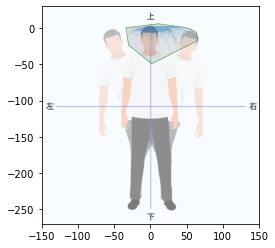

In [54]:

points = np.array(txt_head_data[['pos_x', 'pos_z']])
hull = ConvexHull(points, incremental=True)

im_xz = plt.imread('src_fig\stand-1@2x.png')

plt.imshow(im_xz, extent=[-150, 150, -270, 30])
# plt.scatter(txt_head_data['pos_x'], txt_head_data['pos_z'], s=0.5, alpha=0.5)
plt.plot(txt_head_data['pos_x'], txt_head_data['pos_z'], markersize=100, lw=0.1, alpha=0.5)
new_vertices = np.concatenate((hull.vertices, [hull.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)

plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color='grey', alpha=0.2)

# plt.savefig('../trial1.png', dpi=400)
# plt.close()

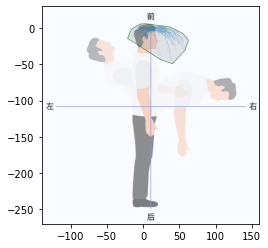

In [60]:
points = np.array(txt_head_data[['pos_y', 'pos_z']])
hull_xy = ConvexHull(points, incremental=True)

im_xy = plt.imread('src_fig/stand-2@2x.png')
plt.imshow(im_xy, extent=[-140, 160, -270, 30])
plt.plot(txt_head_data['pos_y'], txt_head_data['pos_z'], markersize=100, lw=0.1, alpha=0.5)
new_vertices = np.concatenate((hull_xy.vertices, [hull_xy.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)
plt.fill(points[hull_xy.vertices, 0], points[hull_xy.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)

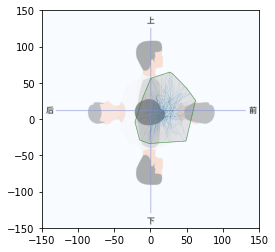

In [62]:
points = np.array(txt_head_data[['pos_y', 'pos_x']])
hull_yz = ConvexHull(points, incremental=True)

im_yz = plt.imread('src_fig/stand-3@2x.png')
plt.imshow(im_yz, extent=[-150, 150, -150, 150])
plt.plot(txt_head_data['pos_y'], txt_head_data['pos_x'], markersize=100, lw=0.1, alpha=0.5)
new_vertices = np.concatenate((hull_yz.vertices, [hull_yz.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)
plt.fill(points[hull_yz.vertices, 0], points[hull_yz.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)

## 坐姿

In [63]:
url_data = requests.get('https://cos.drbrain.net/profile/tj/2022/11/25/c5e6de68-5b23-4cfe-a6ec-cb66cb2e98c5.txt', timeout=2.5)
txt_head_data = text2Df(url_data.text)
txt_head_data.describe()

,timestamp,difficulty,pos_x,pos_y,pos_z
count,1.834000e+03,1834.000000,1834.000000,1834.000000,1834.000000
mean,1.669367e+12,5.546347,1.565791,-4.309185,-1.860654
std,5.295720e+04,1.725670,7.386505,13.687185,3.396457
min,1.669367e+12,3.000000,-23.358000,-41.668000,-14.506000
25%,1.669367e+12,4.000000,-2.022750,-12.652000,-3.573500
50%,1.669367e+12,6.000000,1.732000,-4.471000,-1.658500
75%,1.669367e+12,7.000000,4.716000,4.443250,-0.082500
max,1.669367e+12,8.000000,26.527000,34.829000,11.346000


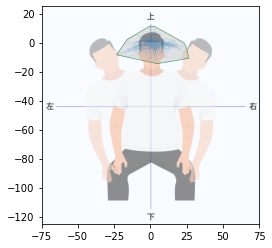

In [70]:
points = np.array(txt_head_data[['pos_x', 'pos_z']])
hull = ConvexHull(points, incremental=True)

im_xz = plt.imread('src_fig\sit-1@2x.png')
plt.imshow(im_xz, extent=[-75, 75, -125, 25])
# plt.scatter(txt_head_data['pos_x'], txt_head_data['pos_z'], s=0.5, alpha=0.5)
plt.plot(txt_head_data['pos_x'], txt_head_data['pos_z'], markersize=100, lw=0.1, alpha=0.5)
new_vertices = np.concatenate((hull.vertices, [hull.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)

plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)
# plt.close()

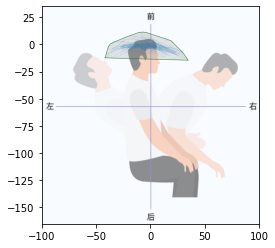

In [82]:
points = np.array(txt_head_data[['pos_y', 'pos_z']])
hull_xy = ConvexHull(points, incremental=True)

im_xy = plt.imread('src_fig/sit-2@2x.png')
plt.imshow(im_xy, extent=[-100, 100, -165, 35])
plt.plot(txt_head_data['pos_y'], txt_head_data['pos_z'], markersize=100, lw=0.1, alpha=0.5)
new_vertices = np.concatenate((hull_xy.vertices, [hull_xy.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)
plt.fill(points[hull_xy.vertices, 0], points[hull_xy.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)

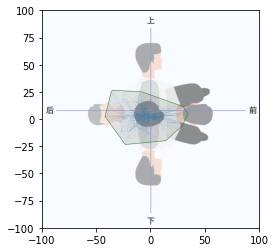

In [79]:
points = np.array(txt_head_data[['pos_y', 'pos_x']])
hull_yz = ConvexHull(points, incremental=True)

im_yz = plt.imread('src_fig/sit-3@2x.png')
plt.imshow(im_yz, extent=[-100, 100, -100, 100])
plt.plot(txt_head_data['pos_y'], txt_head_data['pos_x'], markersize=100, lw=0.1, alpha=0.5)
new_vertices = np.concatenate((hull_yz.vertices, [hull_yz.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)
plt.fill(points[hull_yz.vertices, 0], points[hull_yz.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)

## 头部

In [7]:
url_data = requests.get('https://cos.drbrain.net/profile/tj/2022/11/25/2ebfd8a9-4638-41b1-97d2-59fb498ae57c.txt', timeout=2.5)
txt_head_data = text2Df(url_data.text)
txt_head_data.describe()

,timestamp,difficulty,pos_x,pos_y,pos_z
count,1.840000e+03,1840.000000,1840.000000,1840.000000,1840.000000
mean,1.669367e+12,5.206522,-1.978792,-5.430796,-4.963812
std,5.313075e+04,1.356017,5.864545,8.271955,3.245784
min,1.669367e+12,3.000000,-19.286000,-27.149000,-13.011000
25%,1.669367e+12,4.000000,-5.147500,-10.742250,-6.977000
50%,1.669367e+12,6.000000,-2.057500,-5.733500,-5.523000
75%,1.669367e+12,6.000000,0.548500,-0.935750,-2.890250
max,1.669367e+12,7.000000,19.356000,26.971000,9.636000


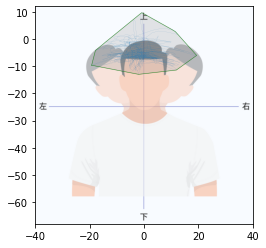

In [99]:
points = np.array(txt_head_data[['pos_x', 'pos_z']])
hull = ConvexHull(points, incremental=True)
im_xz = plt.imread('src_fig\head-1@2x.png')
plt.imshow(im_xz, extent=[-40, 40, -68, 12])
# plt.scatter(txt_head_data['pos_x'], txt_head_data['pos_z'], s=0.5, alpha=0.5)
plt.plot(txt_head_data['pos_x'], txt_head_data['pos_z'], markersize=100, lw=0.1, alpha=0.5)
new_vertices = np.concatenate((hull.vertices, [hull.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)

plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)
# plt.close()

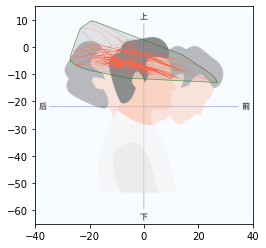

In [14]:
points = np.array(txt_head_data[['pos_y', 'pos_z']])
hull_xy = ConvexHull(points, incremental=True)

im_xy = plt.imread('src_fig/head-2@2x.png')
plt.imshow(im_xy, extent=[-40, 40, -65, 15])
plt.plot(txt_head_data['pos_y'], txt_head_data['pos_z'], color='tomato', markersize=100, lw=0.2, alpha=1)
new_vertices = np.concatenate((hull_xy.vertices, [hull_xy.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'g', lw=0.5, alpha=0.7)
plt.fill(points[hull_xy.vertices, 0], points[hull_xy.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)

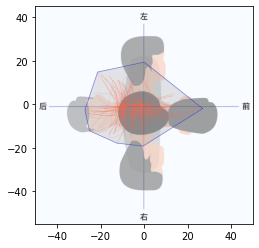

In [11]:
points = np.array(txt_head_data[['pos_y', 'pos_x']])
hull_yz = ConvexHull(points, incremental=True)

im_yz = plt.imread('src_fig/head-3@2x.png')
plt.imshow(im_yz, extent=[-50, 50, -55, 45])
plt.plot(txt_head_data['pos_y'], txt_head_data['pos_x'], color='tomato', markersize=100, lw=0.1, alpha=1)
new_vertices = np.concatenate((hull_yz.vertices, [hull_yz.vertices[0]]))
plt.plot(points[new_vertices,0], points[new_vertices,1], 'b', lw=0.5, alpha=0.5)
plt.fill(points[hull_yz.vertices, 0], points[hull_yz.vertices, 1], color='grey', alpha=0.2)
# plt.savefig('../trial1.png', dpi=400)

In [122]:
pos = np.array(txt_head_data[['timestamp', 'pos_x', 'pos_y', 'pos_z']])
vel = np.diff(pos, axis=0)
def div_by_time(a):
    return np.array([a[1]/a[0], a[2]/a[0], a[3]/a[0]])*10
def calc_norm(vec):
    return 
from numpy import linalg as LA
vel_norm = LA.norm(np.apply_along_axis(div_by_time, 1, vel), ord=2, axis=1)
import json
with open('vel.json', 'w') as f:
    json.dump(list(vel_norm), f)

In [127]:
des = txt_head_data.describe()
des.loc['min', 'pos_x']

-19.286

In [181]:
ball_data = pd.read_csv("https://cos.drbrain.net/profile/tj/2022/11/30/ea69a115-fe53-4845-a5e3-e61f8201d032.txt")
ball_data.describe()

,timestamp,difficulty,ballIndex,status,pos_x,pos_y,pos_z
count,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,1.669775e+12,5.945946,56.000000,0.117117,-3.660225,11.068378,12.856928
std,5.177813e+04,1.688667,32.186954,0.323018,147.120786,82.927186,136.157272
min,1.669775e+12,3.000000,1.000000,0.000000,-199.996000,-147.819000,-199.990000
25%,1.669775e+12,5.000000,28.500000,0.000000,-163.049000,-57.417500,-104.652500
50%,1.669775e+12,6.000000,56.000000,0.000000,1.984000,0.437000,9.263000
75%,1.669775e+12,7.000000,83.500000,0.000000,157.552000,85.208000,142.308500
max,1.669775e+12,8.000000,111.000000,1.000000,200.000000,149.370000,199.822000


In [182]:
head_data = pd.read_csv("https://cos.drbrain.net/profile/tj/2022/11/30/ab8ceef9-5192-4646-967a-9c01ab6e0429.txt")
head_data.describe()
# head_data.loc[1669367200305]

,timestamp,difficulty,pos_x,pos_y,pos_z
count,1.834000e+03,1834.000000,1834.000000,1834.000000,1834.000000
mean,1.669775e+12,5.546347,-5.800286,2.773672,-3.906629
std,5.295760e+04,1.725670,7.293432,10.532332,5.471060
min,1.669775e+12,3.000000,-34.820000,-24.828000,-27.513000
25%,1.669775e+12,4.000000,-9.200250,-3.688750,-7.130750
50%,1.669775e+12,6.000000,-5.741000,2.454000,-3.265000
75%,1.669775e+12,7.000000,-2.563500,7.914250,0.123250
max,1.669775e+12,8.000000,18.848000,38.120000,10.563000


In [176]:
def label_area(row):
    if row['pos_x'] > 0 and row['pos_y'] > 0:
        return 1
    if row['pos_x'] < 0 and row['pos_y'] > 0:
        return 2
    if row['pos_x'] < 0 and row['pos_y'] < 0:
        return 3
    if row['pos_x'] > 0 and row['pos_y'] < 0:
        return 4

area = ball_data.apply(lambda row: label_area(row), axis=1)
ball_data['area'] = area
res_df = pd.DataFrame([ball_data.groupby('area')['status'].count(), ball_data.groupby('area')['status'].sum()], index=['count', 'sum'], columns=[1, 2, 3, 4])
# if '3' not in res_df.columns:
#     res_df['3'] = [0, 0]
# if '4' not in res_df.columns:
#     res_df['4'] = [0, 0]
res_df.loc['succeed'] = 1 - res_df.loc['sum'] / res_df.loc['count']
res_df.loc['rate'] = res_df.loc['count'] / res_df.loc['count'].sum()
res_df.fillna(0)
# res_df.loc['sum', 3].fillna(0)

,1,2,3,4
count,47.000000,45.00000,0.0,0.0
sum,9.000000,9.00000,0.0,0.0
succeed,0.808511,0.80000,0.0,0.0
rate,0.510870,0.48913,0.0,0.0


In [ ]:
arr = np.array([1,2,3],
        [4,5,6],
        [7,8,9],
        [1,2,3],
        [4,5,6])
arr.shape()